# Data Exploration of Store Customers and Candy Bars Purchases

## Investigation Overview
Every store tries to sell as many goods as possible to achieve the maximum turnover. In this dataset I will investigate the customers and their behavior by purchasing the chocolate bars.

## Dataset Overview
The dataset consists of information about the purchases of chocolate candy bars of 500 individuals from a given area when entering a physical ‘FMCG’ store in the period of 2 years. All data has been collected through the loyalty cards they use at checkout. The volume of the dataset has been restricted and anonymised to protect the privacy of the customers. 

## Store customers

### Men vs. Women
### Unexpected but there are more men among store visitors than women

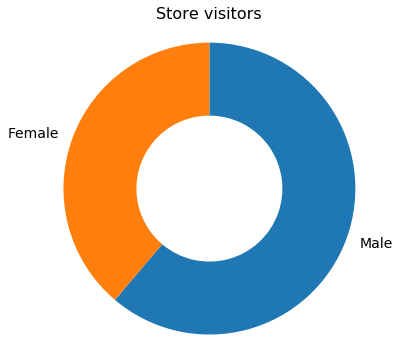

In [18]:
plt.figure(figsize=[10,6])
df_sex = df_clean.groupby(['ID'])['Sex'].value_counts().reset_index(name = 'Sex_count')
df_sex['Sex'].value_counts().plot(kind = 'pie', startangle = 90, fontsize = 14, counterclock = False, wedgeprops = {'width' : 0.5})
plt.axis('square')
plt.xlabel('', fontsize = 14)
plt.ylabel('', fontsize = 14)
plt.title('Store visitors', fontsize = 16)
plt.show()

### Customer Age Distribution
### The most customers are between 25 and 50 years old

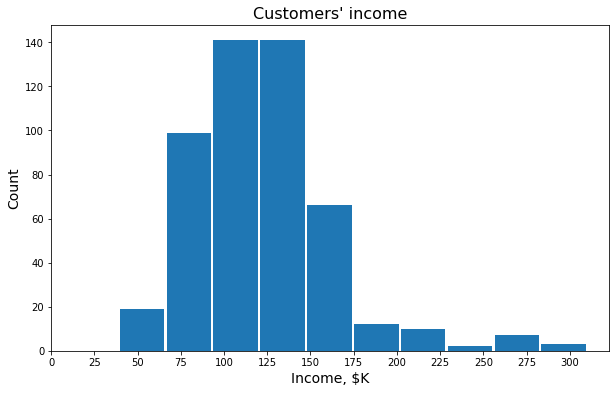

In [19]:
plt.figure(figsize = [10,6])
xticks= range(0,325,25)
df_clean.groupby('ID')['Income'].mean().plot(kind = 'hist', rwidth = 0.95, xticks = xticks)
plt.xlabel('Income, $K', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title("Customers' income" , fontsize = 16)
plt.show()

### Place of Residence
### Customers come mainly from small cities 

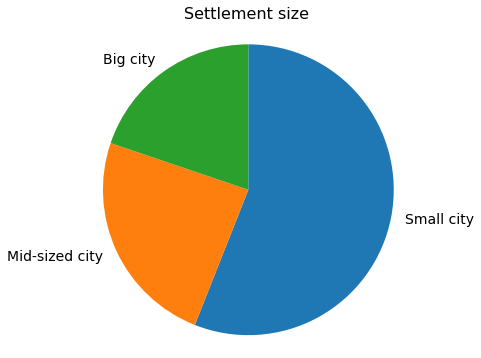

In [21]:
plt.figure(figsize=[10,6])
df_settlement = df_clean.groupby(['ID'])['Settlement size'].value_counts().reset_index(name = 'Settlement size count')
df_settlement['Settlement size'].value_counts().plot(kind = 'pie', startangle = 90, fontsize = 14, counterclock = False)
plt.axis('square')
plt.xlabel('', fontsize = 14)
plt.ylabel('', fontsize = 14)
plt.title('Settlement size', fontsize = 16)
plt.show()

### Income vs. Age
### Men have sligltly higher income then women

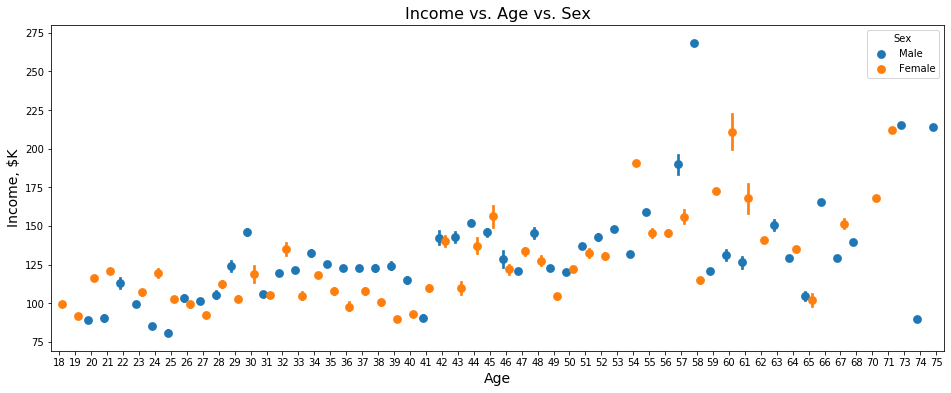

In [41]:
fig = plt.figure(figsize = [16,6])
ax = sns.pointplot(data = df_clean, x = 'Age', y = 'Income', hue = 'Sex',
            linestyles = '', dodge = 0.4)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Income, $K', fontsize = 14)
plt.title('Income vs. Age vs. Sex', fontsize = 16)
plt.show()

### Income vs. spent amount of money for chocolate bars
### There is actually no strong correlation between income and amount of money spent on chocholate bars

## Purchase bahavior of customers

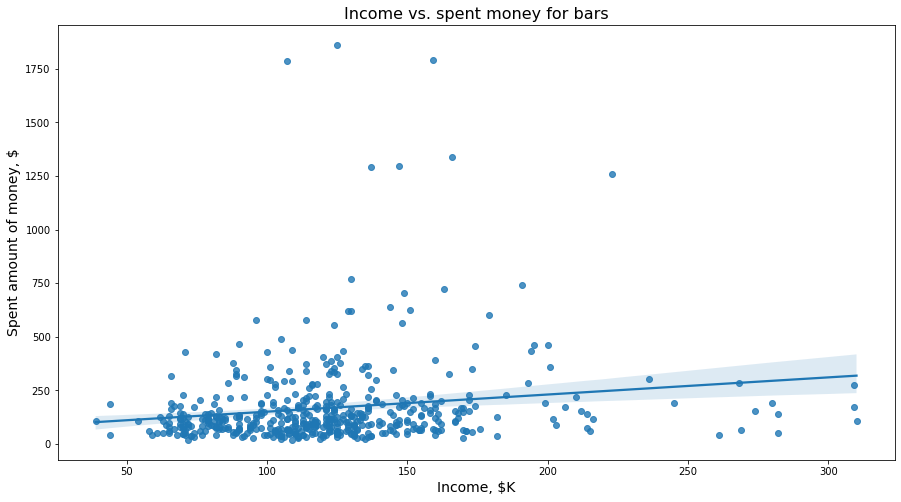

In [35]:
plt.figure(figsize=[15,8])
sns.regplot(df_clean.groupby('ID')['Income'].mean(), df_outcome['Outcome_sum'])
plt.title('Income vs. spent money for bars', fontsize = 16)
plt.xlabel('Income, $K', fontsize = 14)
plt.ylabel('Spent amount of money, $', fontsize = 14)
plt.show()

### Sold amount of bars from each brand
### There are two most popular brands, brand 1 and brand 2

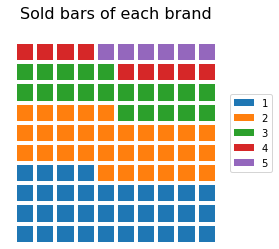

In [24]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

new_df = df_clean[df_clean['Brand'] > 0]
new_df = new_df.reset_index(drop = True)

waffle_counts = percentage_blocks(new_df, 'Brand')
waffle_counts = waffle_counts.reset_index(drop = True)

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

plt.title('Sold bars of each brand', fontsize = 16)
plt.legend(waffle_counts.index + 1, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square');

### Number of sold bars
### Customers buy 1 to 3 chocholate bars pro visit

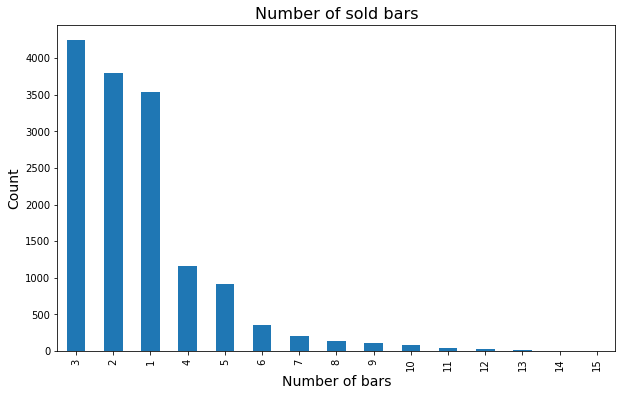

In [25]:
plt.figure(figsize=[10,6])

df_clean['Quantity'].value_counts()[1:].plot(kind = 'bar')

plt.title('Number of sold bars', fontsize = 16)
plt.xlabel('Number of bars', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.show();

### Price development over observation time
### The bar prices are not constant over the time. One reason for that can be promotions

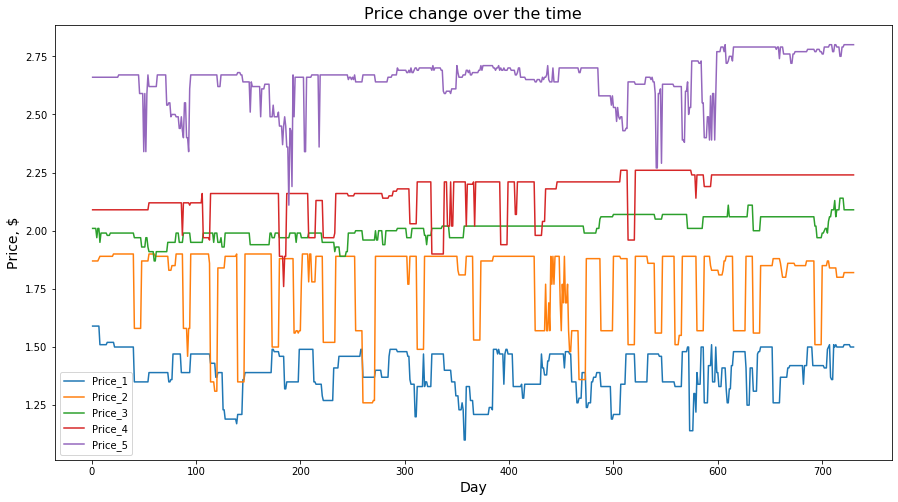

In [31]:
price_cols = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']

plt.figure(figsize=[15,8])

for price in price_cols:
    df_clean.groupby('Day')[price].mean().plot(label = price)


plt.title('Price change over the time', fontsize = 16)
plt.xlabel('Day', fontsize = 14)
plt.ylabel('Price, $', fontsize = 14)
plt.legend(loc='best')
plt.show()